In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import qutip
import theano
import theano.tensor as T
import QubitNetwork
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Hadamard gate reached with perfect fidelity using 3 qubits + 2 ancillae.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


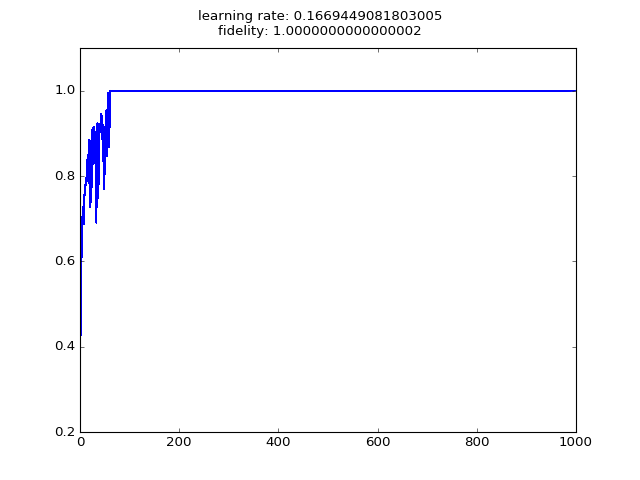

Finished training
Network saved in nets/hadamard5qb.pickle


In [11]:
net = QubitNetwork.QubitNetwork(
    num_qubits=5,
    interactions='all',
    self_interactions='all',
    system_qubits=3
)
net, _ = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=qutip.hadamard_transform(3),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/hadamard5qb.pickle'
)

In [32]:
qutip.fredkin()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

In [33]:
net = QubitNetwork.load_network_from_file('nets/hadamard5qb.pickle')
gate = qutip.Qobj(net.get_current_gate(), dims=[[2, 2, 2, 2, 2]] * 2)
gate.ptrace([0, 1, 2])

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 1.99999127 -5.55111512e-16j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  1.00001791 -2.58095255e-04j
   0.99999623 -2.82614885e-04j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  0.99999402 -3.16056808e-04j
   0.99996561 -2.54568243e-04j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]
 [ 0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  1.99999111 -1.76682616e-04j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.0

### Failing to reach a randomly picked unitary, with two ancillary qubits

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


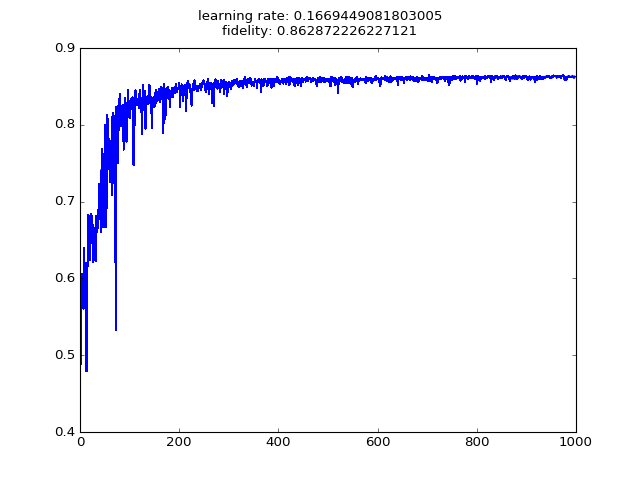

Finished training
Network saved in nets/random5qb.pickle


In [35]:
rand_U = qutip.rand_unitary(8, dims=[[2, 2, 2]] * 2)
net = QubitNetwork.QubitNetwork(
    num_qubits=5,
    interactions='all',
    self_interactions='all',
    system_qubits=3
)
net, _ = QubitNetwork.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=1000,
    batch_size=2,
    target_gate=rand_U,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.005,
    saveafter_file='nets/random5qb.pickle'
)